In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass

sns.set_style('darkgrid')  # Options: darkgrid, whitegrid, dark, white, ticks
sns.set_context('talk')  # Options: paper, notebook, talk, poster

In [4]:
@dataclass
class EpochData:
    """Class for keeping track of data associated with an epoch."""
    epoch: int
    loss: float
    train_accuracy: float
    test_accuracy: float


def get_data(filename):
    lines = open(filename).read().strip().split('\n')
    command = lines[0]
    datalines = lines[1:]
    data = []
    for l in datalines:
        tokens = l.split(' | ')
        epoch = int(tokens[0].split(':')[1].strip())
        loss = float(tokens[1].split(':')[1].strip())
        train_accuracy = float(tokens[2].split(':')[1].strip())
        test_accuracy = float(tokens[3].split(':')[1].strip())
        epoch_data = EpochData(epoch, loss, train_accuracy, test_accuracy)
        data.append(epoch_data)
    return command, data

In [38]:
factorization_25_1024_1e3_16  = 'training_log_20220822_071024.txt'
factorization_25_1024_1e3_32  = 'training_log_20220822_202354.txt'
factorization_25_1024_1e3_64  = 'training_log_20220822_202447.txt'
factorization_25_1024_1e3_128 = 'training_log_20220822_202658.txt'
factorization_25_512_1e3_16   = 'training_log_20220823_095749.txt'
factorization_25_2048_1e3_16  = 'training_log_20220823_095800.txt'
factorization_25_1024_1e2_16  = 'training_log_20220823_095925.txt'
factorization_25_1024_1e4_16  = 'training_log_20220823_095938.txt'

neural_net_simple_25_512_1e3_128 = 'training_log_20220828_164104.txt'

neural_net_ff_25_512_1e3_128 = 'training_log_20220828_164935.txt'

files = {
    'factorization_25_1024_1e3_16': 'training_log_20220822_071024.txt',
    'factorization_25_1024_1e3_32': 'training_log_20220822_202354.txt',
    'factorization_25_1024_1e3_64': 'training_log_20220822_202447.txt',
    'factorization_25_1024_1e3_128': 'training_log_20220822_202658.txt',
    'factorization_25_512_1e3_16': 'training_log_20220823_095749.txt',
    'factorization_25_2048_1e3_16': 'training_log_20220823_095800.txt',
    'factorization_25_1024_1e2_16': 'training_log_20220823_095925.txt',
    'factorization_25_1024_1e4_16': 'training_log_20220823_095938.txt',

    'nn_simple_25_512_1e3_128': 'training_log_20220828_164104.txt',

    'nn_ff_25_512_1e3_128': 'training_log_20220828_164935.txt',
}

## Best Test Eval Graph

<AxesSubplot:>

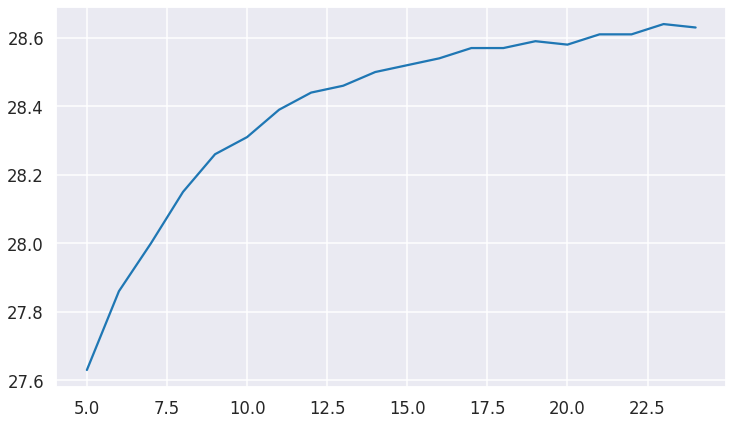

In [14]:
_, data = get_data(files['factorization_25_1024_1e3_128'])
epochs = [d.epoch for d in data][5:]
test_accuracy = [d.test_accuracy for d in data][5:]

width = 12
length = 7
fig, axs = plt.subplots(1, 1, figsize=(width, length))
sns.lineplot(x=epochs, y=test_accuracy)

## Compare Hyperparameters for Matrix Factorization

<AxesSubplot:xlabel='Epochs', ylabel='value'>

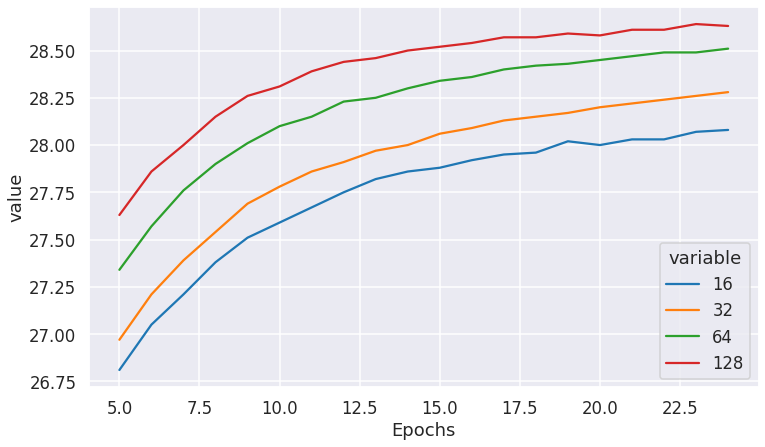

In [30]:
# Embedding Size
_, data16 = get_data(files['factorization_25_1024_1e3_16'])
_, data32 = get_data(files['factorization_25_1024_1e3_32'])
_, data64 = get_data(files['factorization_25_1024_1e3_64'])
_, data128 = get_data(files['factorization_25_1024_1e3_128'])
epochs = [d.epoch for d in data16][5:]
test_accuracy16 = [d.test_accuracy for d in data16][5:]
test_accuracy32 = [d.test_accuracy for d in data32][5:]
test_accuracy64 = [d.test_accuracy for d in data64][5:]
test_accuracy128 = [d.test_accuracy for d in data128][5:]

width = 12
length = 7
fig, axs = plt.subplots(1, 1, figsize=(width, length))

data_preproc = pd.DataFrame({
    'Epochs': epochs, 
    '16': test_accuracy16,
    '32': test_accuracy32,
    '64': test_accuracy64,
    '128': test_accuracy128})

sns.lineplot(x='Epochs', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Epochs']))

<AxesSubplot:xlabel='Epochs', ylabel='value'>

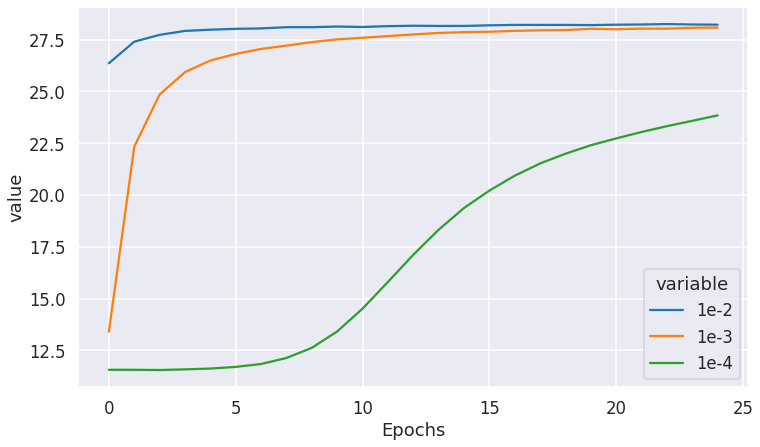

In [32]:
# Learning Rate
_, data2 = get_data(files['factorization_25_1024_1e2_16'])
_, data3 = get_data(files['factorization_25_1024_1e3_16'])
_, data4 = get_data(files['factorization_25_1024_1e4_16'])
epochs = [d.epoch for d in data16][0:]
test_accuracy2 = [d.test_accuracy for d in data2][0:]
test_accuracy3 = [d.test_accuracy for d in data3][0:]
test_accuracy4 = [d.test_accuracy for d in data4][0:]

width = 12
length = 7
fig, axs = plt.subplots(1, 1, figsize=(width, length))

data_preproc = pd.DataFrame({
    'Epochs': epochs, 
    '1e-2': test_accuracy2,
    '1e-3': test_accuracy3,
    '1e-4': test_accuracy4})

sns.lineplot(x='Epochs', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Epochs']))

<AxesSubplot:xlabel='Epochs', ylabel='value'>

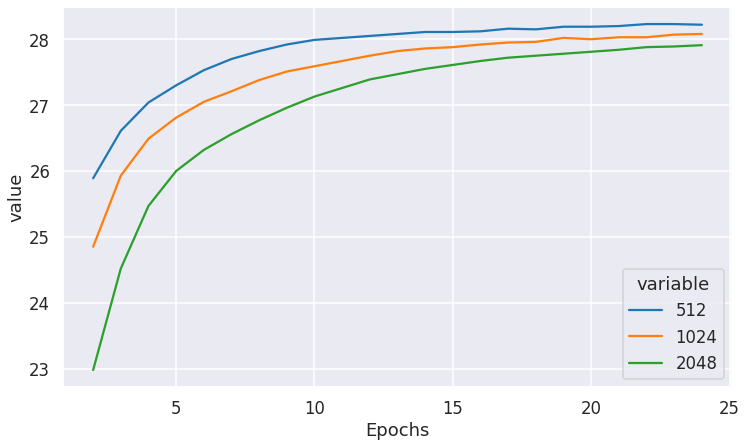

In [36]:
# Batch Size
_, data512 = get_data(files['factorization_25_512_1e3_16'])
_, data1024 = get_data(files['factorization_25_1024_1e3_16'])
_, data2048 = get_data(files['factorization_25_2048_1e3_16'])
epochs = [d.epoch for d in data16][2:]
test_accuracy512 = [d.test_accuracy for d in data512][2:]
test_accuracy1024 = [d.test_accuracy for d in data1024][2:]
test_accuracy2048 = [d.test_accuracy for d in data2048][2:]

width = 12
length = 7
fig, axs = plt.subplots(1, 1, figsize=(width, length))

data_preproc = pd.DataFrame({
    'Epochs': epochs, 
    '512': test_accuracy512,
    '1024': test_accuracy1024,
    '2048': test_accuracy2048})

sns.lineplot(x='Epochs', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Epochs']))

## Compare Matrix Factorization with Neural Networks

<AxesSubplot:xlabel='Epochs', ylabel='value'>

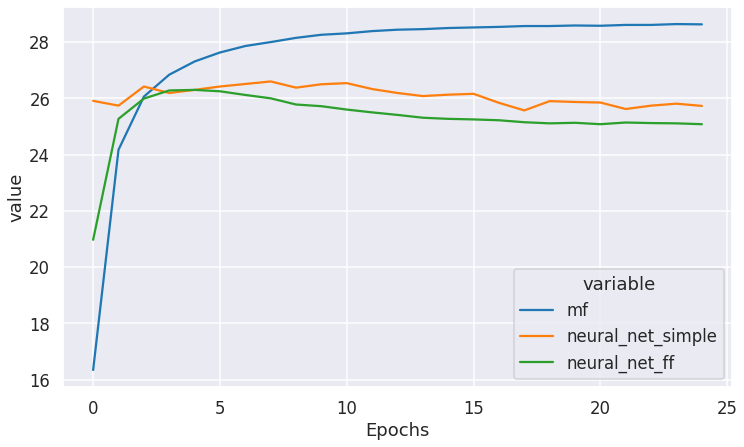

In [40]:
_, data_mf = get_data(files['factorization_25_1024_1e3_128'])
_, data_nn1 = get_data(files['nn_simple_25_512_1e3_128'])
_, data_nn2 = get_data(files['nn_ff_25_512_1e3_128'])
epochs = [d.epoch for d in data16][0:]
test_accuracy_mf = [d.test_accuracy for d in data_mf][0:]
test_accuracy_nn1 = [d.test_accuracy for d in data_nn1][0:]
test_accuracy_nn2 = [d.test_accuracy for d in data_nn2][0:]

width = 12
length = 7
fig, axs = plt.subplots(1, 1, figsize=(width, length))

data_preproc = pd.DataFrame({
    'Epochs': epochs, 
    'mf': test_accuracy_mf,
    'neural_net_simple': test_accuracy_nn1,
    'neural_net_ff': test_accuracy_nn2})

sns.lineplot(x='Epochs', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Epochs']))